# Data Science Project: Bank Marketing (Campaign) Week 9

# Data Lover Team

## Dealing with 'unknown'

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

In [2]:
bank_add_full = pd.read_csv('~/Documents/GitHub/Bank_Marketing_Group_Project/bank-additional/bank-additional-full.csv', delimiter = ';')
bank_add_test = pd.read_csv('~/Documents/GitHub/Bank_Marketing_Group_Project/bank-additional/bank-additional.csv', delimiter = ';')
bank_full = pd.read_csv('~/Documents/GitHub/Bank_Marketing_Group_Project/bank/bank-full.csv', delimiter = ';')
bank_test = pd.read_csv('~/Documents/GitHub/Bank_Marketing_Group_Project/bank/bank.csv', delimiter = ';')

In [3]:
bank_add_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
col=['age',"duration","campaign","pdays","previous","emp.var.rate", "cons.price.idx","euribor3m", "nr.employed"]

var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(bank_add_full[col])

var_thr.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True])

As per the above code, we are dropping columns that are 75% or more similar. Therefore, "previous" should be deleted. In addition, according to the data description, "duration" should be deleted when it comes to predictive model.

In [6]:
bank_add_full.drop('duration', axis = 1, inplace = True)
bank_add_test.drop('duration', axis = 1, inplace = True)  
bank_add_full.drop('previous', axis = 1, inplace = True)
bank_add_test.drop('previous', axis = 1, inplace = True)  

Let's take loot at 'unknown' using bar chart.

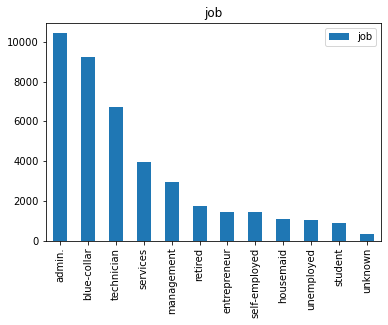

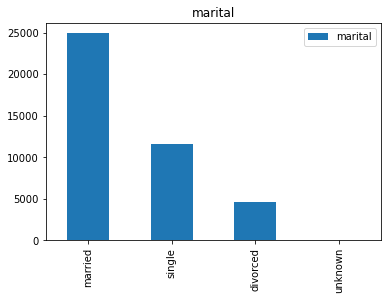

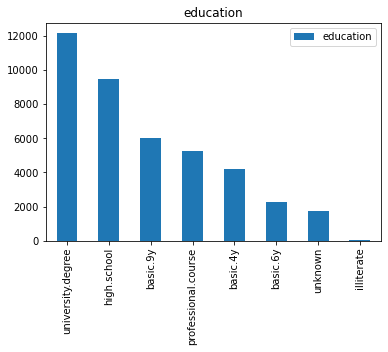

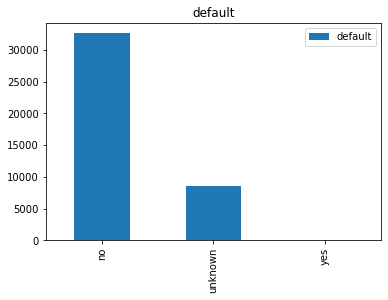

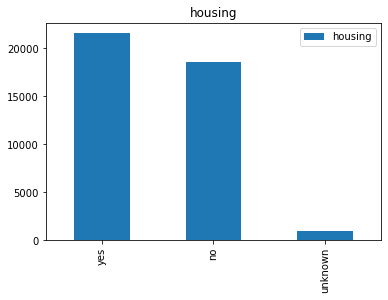

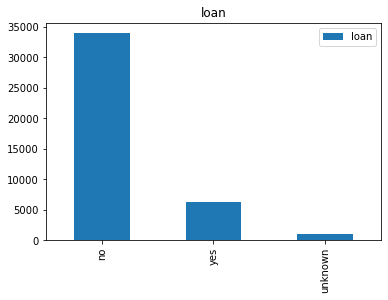

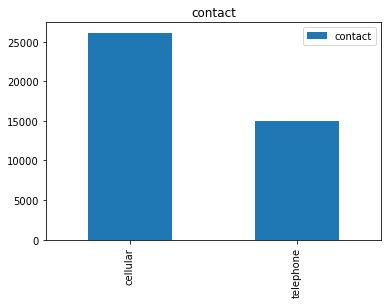

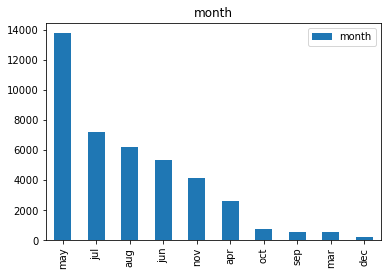

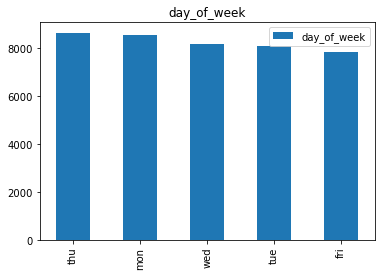

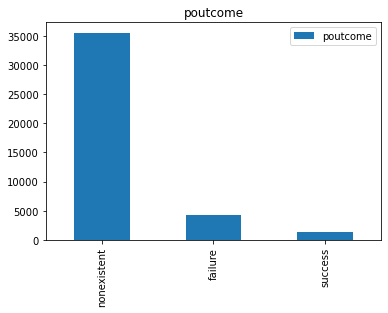

In [7]:
cat_var=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

for i in  cat_var:
    pd.DataFrame(bank_add_full[i].value_counts()).plot(kind='bar', title=i)

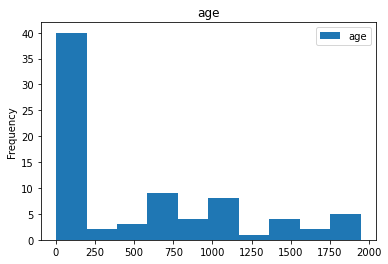

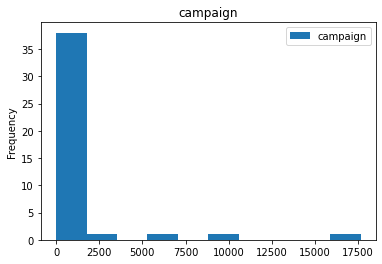

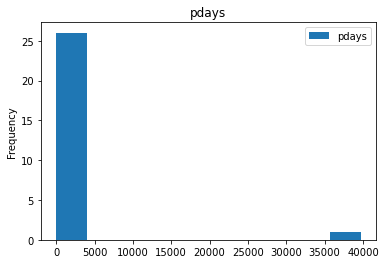

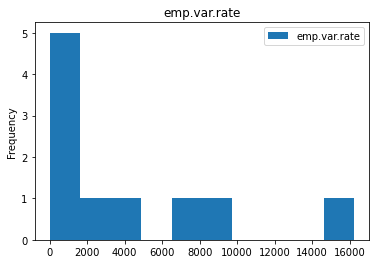

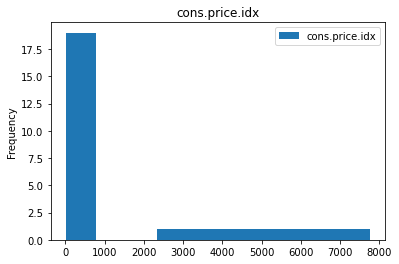

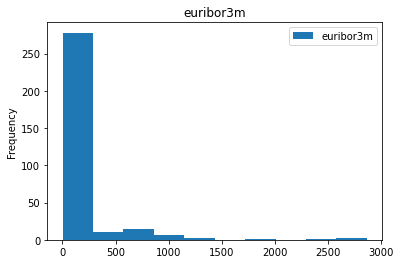

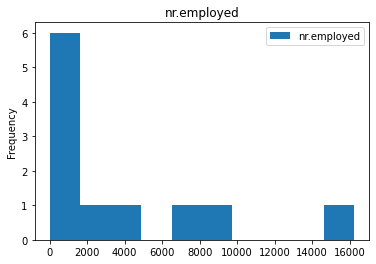

In [8]:
new_col=['age',"campaign","pdays","emp.var.rate", "cons.price.idx","euribor3m", "nr.employed"]

for i in  new_col:
    pd.DataFrame(bank_add_full[i].value_counts()).plot(kind='hist', title=i)

We can consider that if 'age' > 65, then the 'job' can be 'retired'. However, that majority of them are placed below 65, so we should try more analysis.


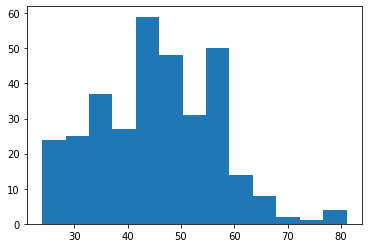

In [9]:
df1= bank_add_full['age'][bank_add_full['job']=='unknown']
plt.hist(df1, bins='auto');

In [10]:
bank_add_full.loc[(bank_add_full['age']>60) & (bank_add_full['job']=='unknown'), 'job'] = 'retired'

In [11]:
pd.crosstab(bank_add_full['job'], bank_add_full['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,601,75,145,276,3,243,286,112
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


From the cross tab, we can conclud:

if  'job' = 'housemaid', it can be 'education' = 'basic.4y'

if  'job' = 'management', it can be 'education' = 'university.degree'

if  'job' = 'services', it can be 'education' = 'high.school'

if  'job' = 'student', it can be 'education' = 'high.school'


if 'education' = 'basic.4y','basic.6y', or'basic.9y',it can be  'job' = 'blue-collar'

if 'education' = 'professional.course', it can be 'job' = 'technician'




In [12]:
bank_add_full.loc[(bank_add_full['education']=='unknown') & (bank_add_full['job']=='management'), 'education'] = 'university.degree'
bank_add_full.loc[(bank_add_full['education']=='unknown') & (bank_add_full['job']=='services'), 'education'] = 'high.school'
bank_add_full.loc[(bank_add_full['education']=='unknown') & (bank_add_full['job']=='housemaid'), 'education'] = 'basic.4y'
bank_add_full.loc[(bank_add_full['education']=='unknown') & (bank_add_full['job']=='student'), 'education'] = 'high.school'
bank_add_full.loc[(bank_add_full['job'] == 'unknown') & (bank_add_full['education']=='basic.4y'), 'job'] = 'blue-collar'
bank_add_full.loc[(bank_add_full['job'] == 'unknown') & (bank_add_full['education']=='basic.6y'), 'job'] = 'blue-collar'
bank_add_full.loc[(bank_add_full['job'] == 'unknown') & (bank_add_full['education']=='basic.9y'), 'job'] = 'blue-collar'
bank_add_full.loc[(bank_add_full['job']=='unknown') & (bank_add_full['education']=='professional.course'), 'job'] = 'technician'

After imputing based on some analysis, for the rest part of the imputation, we use "SimpleImputer" and 'most_frequent' for categorical data. 

In [13]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values="unknown", strategy='most_frequent')
imp_mean=imp_mean.fit(bank_add_full)
bank_add_full_imp=imp_mean.transform(bank_add_full)
bank_add_full_imp=pd.DataFrame(bank_add_full_imp, columns=bank_add_full.columns)
bank_add_full_imp.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Duplications and outliers 

In [14]:
#Remove duplications
bank_add_full_imp.drop_duplicates(inplace = True)

In [16]:
bank_add_full_imp['age'] = bank_add_full_imp['age'].astype(int, errors = 'raise')
bank_add_full_imp['campaign'] = bank_add_full_imp['campaign'].astype(int, errors = 'raise')
bank_add_full_imp['pdays'] = bank_add_full_imp['pdays'].astype(int, errors = 'raise')
bank_add_full_imp['emp.var.rate'] = bank_add_full_imp['emp.var.rate'].astype(float, errors = 'raise')
bank_add_full_imp['cons.price.idx'] = bank_add_full_imp['cons.price.idx'].astype(float, errors = 'raise')
bank_add_full_imp['cons.conf.idx'] = bank_add_full_imp['cons.conf.idx'].astype(float, errors = 'raise')
bank_add_full_imp['euribor3m'] = bank_add_full_imp['euribor3m'].astype(float, errors = 'raise')
bank_add_full_imp['nr.employed'] = bank_add_full_imp['nr.employed'].astype(float, errors = 'raise')

In [18]:
print(bank_add_full_imp[['age', 'campaign']].describe())

                age      campaign
count  39068.000000  39068.000000
mean      40.122172      2.628161
std       10.474581      2.823496
min       17.000000      1.000000
25%       32.000000      1.000000
50%       38.000000      2.000000
75%       47.000000      3.000000
max       98.000000     56.000000


MAx number for 'age' is 98, and it is not unsual based on mean and other factors, so we leave these ages untouched. 
Similarly, 56 for 'campaign' is not unsual too, but that is way far from the mean. However, it is important to have such a client in the dataset. Thus, we leave these 'campaign' untouched too. 

## EDA

<b>In this section, the relationship between y, response variable, and input variables will be discussed.</b>

In [23]:
df1 = bank_add_full_imp.groupby(by=['y', "default"]).agg(no_customer=('campaign',
                                                             'count'))
df1

no_customer
y   default             
no  no             34471
    yes                3
yes no              4594

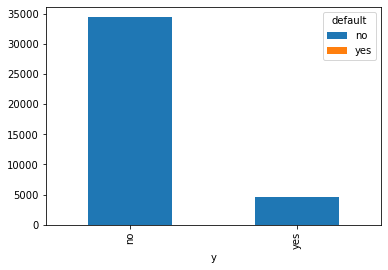

In [24]:
df1.unstack()["no_customer"].plot.bar(stacked=True);

In [26]:
bank_add_full_imp.default.value_counts()

no     39065
yes        3
Name: default, dtype: int64

According to tha fact that, all of the customer in this dataset,except for 3 of them, are not deafult, so we can remove this feature, since it has not any predictive power to be modeled. 

In [76]:
df2 = bank_add_full_imp.groupby(by=['y', "loan"]).agg(no_customer=('campaign',
                                                             'count'))
df2['percent']= df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df2

no_customer    percent
y   loan                        
no  no          28991  84.095260
    yes          5483  15.904740
yes no           3912  85.154549
    yes           682  14.845451

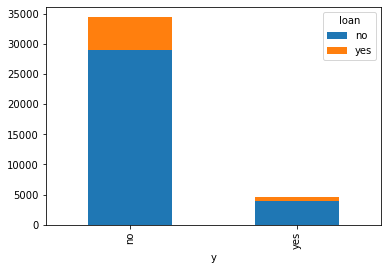

In [29]:
df2.unstack()["no_customer"].plot.bar(stacked=True);

In [75]:
df3 = bank_add_full_imp.groupby(by=['y', "housing"]).agg(no_customer=('campaign',
                                                             'count'))
df3['percent']= df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df3

no_customer    percent
y   housing                        
no  no             15738  45.651796
    yes            18736  54.348204
yes no              2011  43.774488
    yes             2583  56.225512

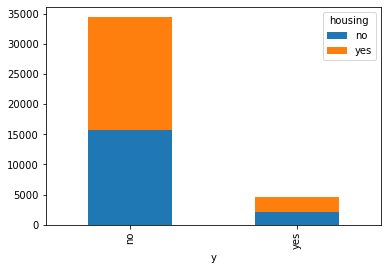

In [32]:
df3.unstack()["no_customer"].plot.bar(stacked=True);

In [74]:
df4 = bank_add_full_imp.groupby(by=['y', "contact"]).agg(no_customer=('campaign',
                                                             'count'))
df4['percent']= df4.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df4

no_customer    percent
y   contact                          
no  cellular         20683  59.995939
    telephone        13791  40.004061
yes cellular          3807  82.868960
    telephone          787  17.131040

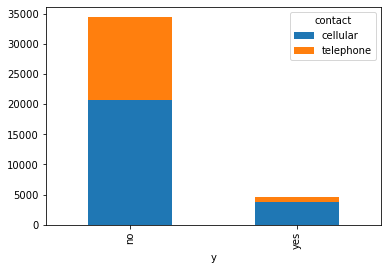

In [34]:
df4.unstack()["no_customer"].plot.bar(stacked=True);

In [73]:
df5 = bank_add_full_imp.groupby(by=["month",'y']).agg(no_customer=('campaign',
                                                             'count'))
df5['percent']= df5.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df5

no_customer    percent
month y                          
apr   no          1998  79.003559
      yes          531  20.996441
aug   no          5006  88.507779
      yes          650  11.492221
dec   no            93  51.381215
      yes           88  48.618785
jul   no          5999  90.291993
      yes          645   9.708007
jun   no          4665  89.384940
      yes          554  10.615060
mar   no           261  49.338374
      yes          268  50.661626
may   no         12274  93.295835
      yes          882   6.704165
nov   no          3476  89.472329
      yes          409  10.527671
oct   no           393  55.744681
      yes          312  44.255319
sep   no           309  54.787234
      yes          255  45.212766

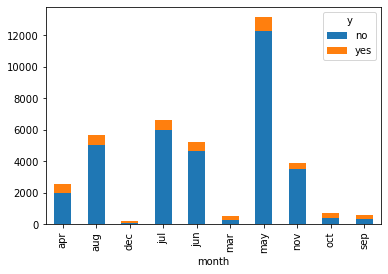

In [41]:
df5.unstack()["no_customer"].plot.bar(stacked=True);

In [72]:
df6 = bank_add_full_imp.groupby(by=[ "day_of_week", 'y']).agg(no_customer=('campaign',
                                                             'count'))
df6['percent']= df6.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df6

no_customer    percent
day_of_week y                          
fri         no          6659  88.798506
            yes          840  11.201494
mon         no          7278  89.630542
            yes          842  10.369458
thu         no          7080  87.235091
            yes         1036  12.764909
tue         no          6677  87.624672
            yes          943  12.375328
wed         no          6780  87.903539
            yes          933  12.096461

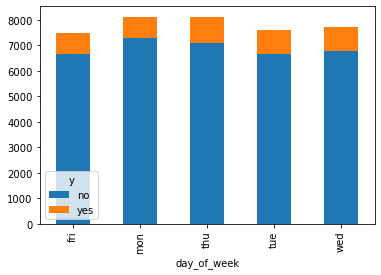

In [43]:
df6.unstack()["no_customer"].plot.bar(stacked=True);

In [71]:
df7 = bank_add_full_imp.groupby(by=[ "poutcome", 'y']).agg(no_customer=('campaign',
                                                             'count'))
df7['percent']= df7.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df7

no_customer    percent
poutcome    y                          
failure     no          3559  85.511773
            yes          603  14.488227
nonexistent no         30437  90.761891
            yes         3098   9.238109
success     no           478  34.865062
            yes          893  65.134938

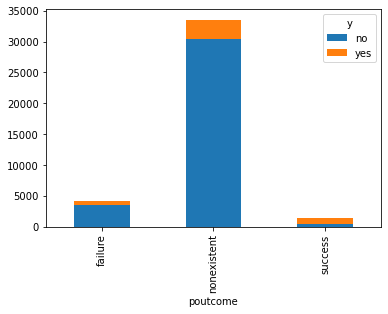

In [46]:
df7.unstack()["no_customer"].plot.bar(stacked=True);

In [70]:
df8 = bank_add_full_imp.groupby(by=[ "job", 'y']).agg(no_customer=('campaign',
                                                             'count'))
df8['percent']= df8.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df8

no_customer    percent
job           y                          
admin.        no          8619  86.414678
              yes         1355  13.585322
blue-collar   no          8174  92.749348
              yes          639   7.250652
entrepreneur  no          1281  91.369472
              yes          121   8.630528
housemaid     no           922  89.688716
              yes          106  10.311284
management    no          2480  88.413547
              yes          325  11.586453
retired       no          1258  74.174528
              yes          438  25.825472
self-employed no          1232  89.210717
              yes          149  10.789283
services      no          3442  91.445271
              yes          322   8.554729
student       no           579  68.117647
              yes          271  31.882353
technician    no          5640  88.581750
              yes          727  11.418250
unemployed    no           847  85.728745
              yes          141  14.271255

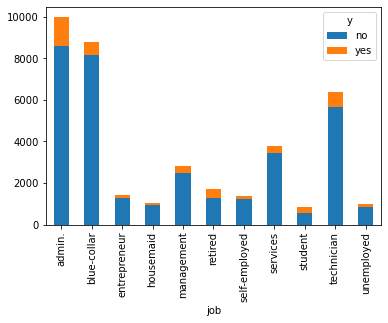

In [48]:
df8.unstack()["no_customer"].plot.bar(stacked=True);

In [69]:
df9 = bank_add_full_imp.groupby(by=[ "marital", 'y']).agg(no_customer=('campaign',
                                                             'count'))
df9['percent']= df9.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df9

no_customer    percent
marital  y                          
divorced no          3977  89.410971
         yes          471  10.589029
married  no         21159  89.338794
         yes         2525  10.661206
single   no          9338  85.387710
         yes         1598  14.612290

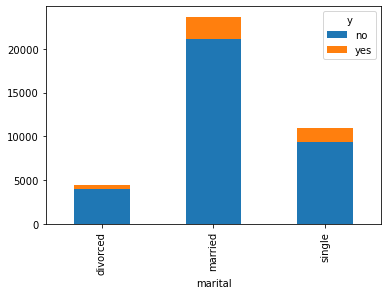

In [50]:
df9.unstack()["no_customer"].plot.bar(stacked=True);

In [66]:
df10 = bank_add_full_imp.groupby(by=[ "education", 'y']).agg(no_customer=('campaign',
                                                             'count'))
df10['percent']= df10.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df10

no_customer    percent
education           y                          
basic.4y            no          3557  89.214949
                    yes          430  10.785051
basic.6y            no          2019  91.481649
                    yes          188   8.518351
basic.9y            no          5250  91.847446
                    yes          466   8.152554
high.school         no          8266  88.255392
                    yes         1100  11.744608
illiterate          no            14  77.777778
                    yes            4  22.222222
professional.course no          4394  88.144433
                    yes          591  11.855567
university.degree   no         10974  85.808116
                    yes         1815  14.191884

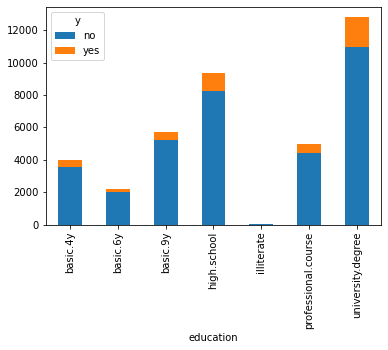

In [67]:
df10.unstack()["no_customer"].plot.bar(stacked=True);

<big><b>Correlation</big>

In [78]:
bank_add_full_imp[new_col].corr()

,age,campaign,pdays,emp.var.rate,cons.price.idx,euribor3m,nr.employed
age,1.000000,0.000960,-0.033645,0.002196,0.000739,0.012923,-0.014911
campaign,0.000960,1.000000,0.057263,0.159976,0.129095,0.144207,0.154047
pdays,-0.033645,0.057263,1.000000,0.273849,0.080112,0.300192,0.375864
emp.var.rate,0.002196,0.159976,0.273849,1.000000,0.776432,0.971851,0.905215
cons.price.idx,0.000739,0.129095,0.080112,0.776432,1.000000,0.687168,0.519165
euribor3m,0.012923,0.144207,0.300192,0.971851,0.687168,1.000000,0.944623
nr.employed,-0.014911,0.154047,0.375864,0.905215,0.519165,0.944623,1.000000


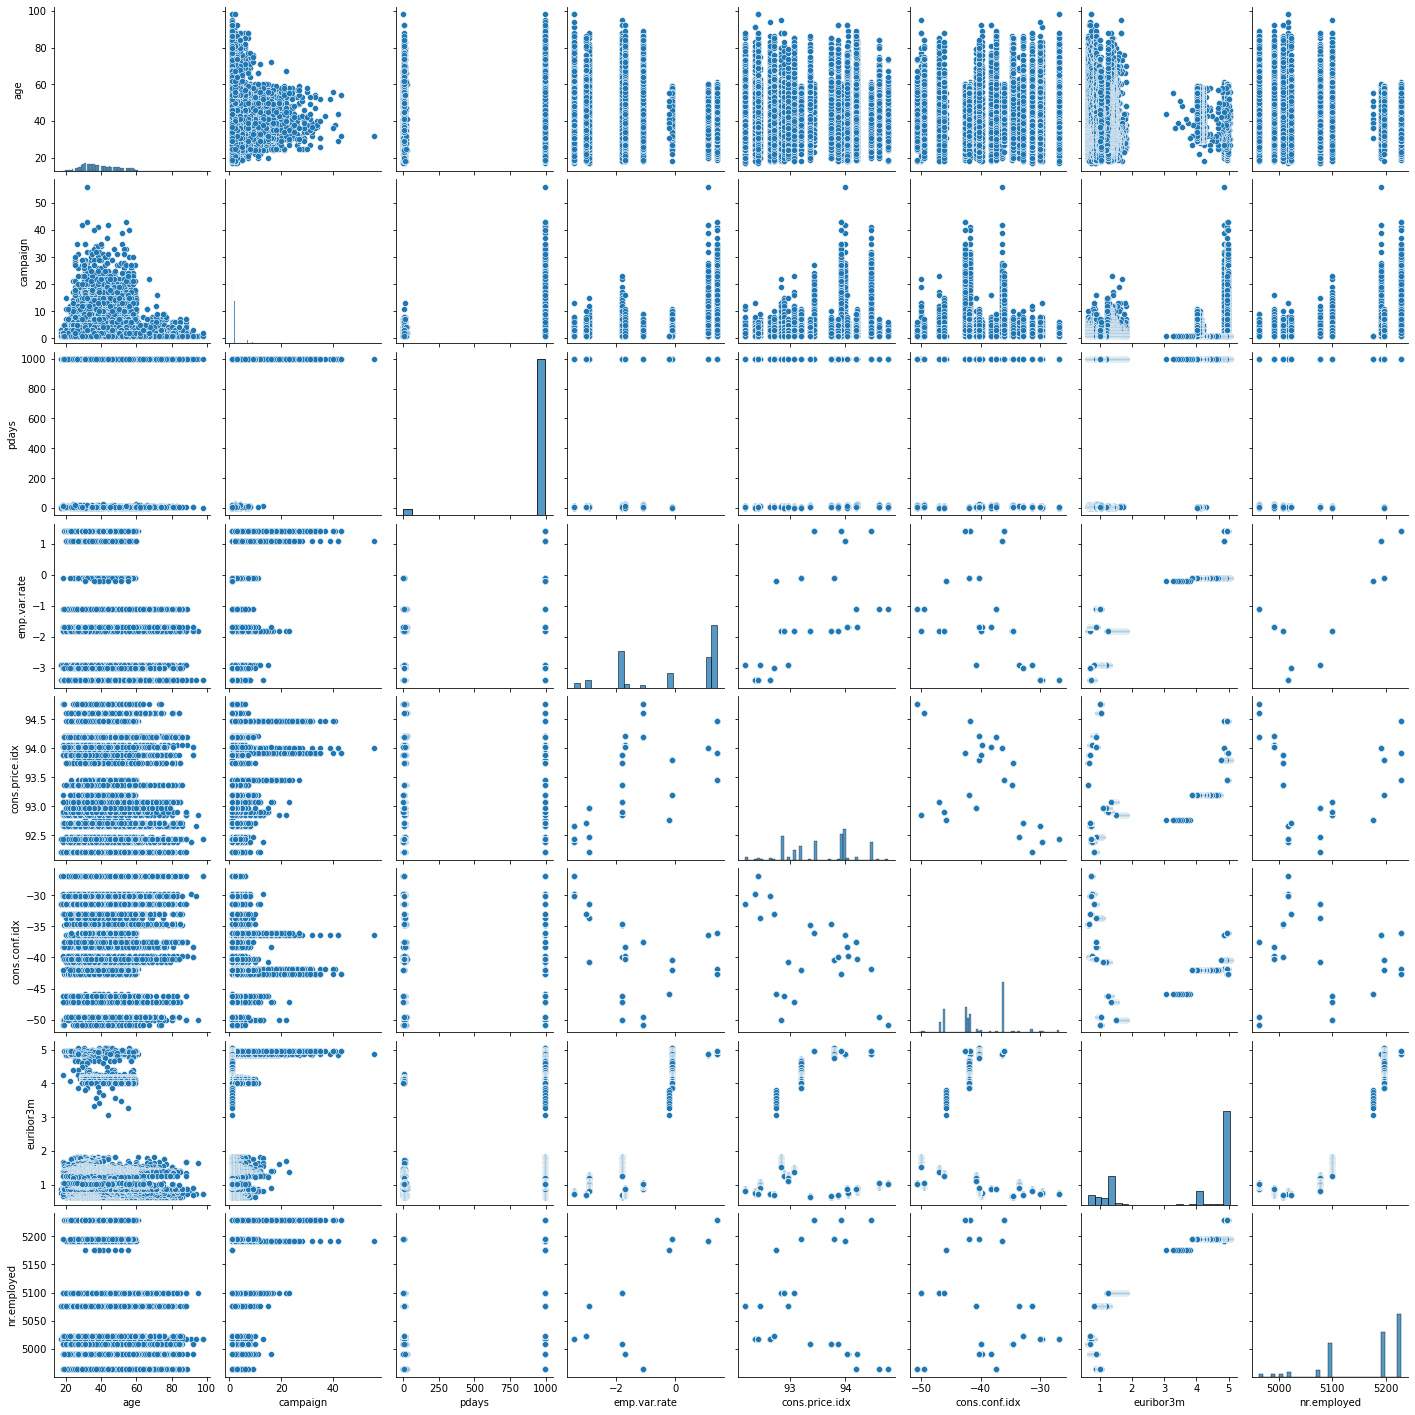

In [87]:
sns.pairplot(bank_add_full_imp[new_col])
plt.show()

<big><b>Age groups</b></big>

Group 1: 17 - 30

Group 2: 31 - 40

Group 3: 41 - 50

Group 4: 51 - 60

Group 5: 61+


In [99]:
groups = bank_add_full_imp['age'].apply(lambda x: '17-30' if x<=30 else ('31-40' if x<=40 else ('41-50' if x<=50 else ('51-60' if x<=60 else '60+'))))
                                        
bank_add_full_imp['age_group'] = groups

df11 = bank_add_full_imp.groupby('age_group').age.count().reset_index()
df11

,age_group,age
0,17-30,6957
1,31-40,15427
2,41-50,9748
3,51-60,6044
4,60+,892


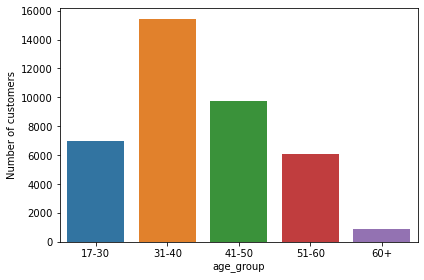

In [101]:
sns.barplot(x = 'age_group', y = 'age', data = df11)
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

In [104]:
df12 = bank_add_full_imp.groupby(by=[ "age_group", 'y']).agg(no_customer=('campaign',
                                                             'count'))
df12['percent']= df12.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df12

no_customer    percent
age_group y                          
17-30     no          5848  84.059221
          yes         1109  15.940779
31-40     no         13846  89.751734
          yes         1581  10.248266
41-50     no          8917  91.475174
          yes          831   8.524826
51-60     no          5379  88.997353
          yes          665  11.002647
60+       no           484  54.260090
          yes          408  45.739910

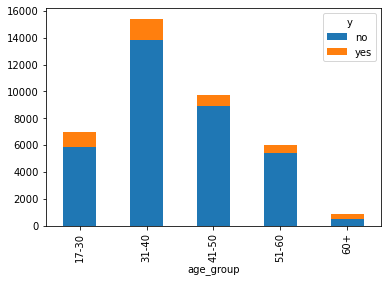

In [105]:
df12.unstack()["no_customer"].plot.bar(stacked=True);

                   no_customer    percent
age_group housing                        
17-30     no              3153  45.321259
          yes             3804  54.678741
31-40     no              7017  45.485188
          yes             8410  54.514812
41-50     no              4453  45.681165
          yes             5295  54.318835
51-60     no              2746  45.433488
          yes             3298  54.566512
60+       no               380  42.600897
          yes              512  57.399103


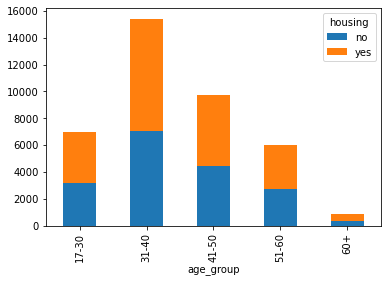

In [106]:
df13 = bank_add_full_imp.groupby(by=[ "age_group", 'housing']).agg(no_customer=('campaign',
                                                             'count'))
df13['percent']= df13.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(df13)
df13.unstack()["no_customer"].plot.bar(stacked=True);

                               no_customer    percent
education           age_group                        
basic.4y            17-30              247   6.195134
                    31-40              855  21.444695
                    41-50             1301  32.631051
                    51-60             1233  30.925508
                    60+                351   8.803612
basic.6y            17-30              249  11.282284
                    31-40              949  42.999547
                    41-50              724  32.804712
                    51-60              263  11.916629
                    60+                 22   0.996828
basic.9y            17-30             1118  19.559132
                    31-40             2240  39.188244
                    41-50             1536  26.871938
                    51-60              780  13.645906
                    60+                 42   0.734780
high.school         17-30             2313  24.695708
                    31-40   

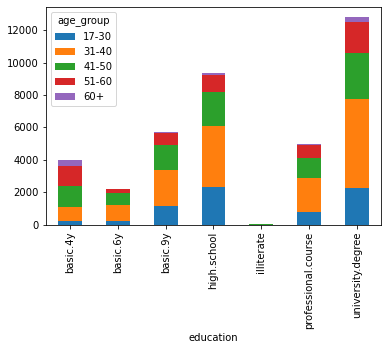

In [108]:
df14 = bank_add_full_imp.groupby(by=['education', "age_group"]).agg(no_customer=('campaign',
                                                             'count'))
df14['percent']= df14.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(df14)
df14.unstack()["no_customer"].plot.bar(stacked=True);

                    no_customer    percent
age_group marital                         
17-30     divorced          219   3.147909
          married          2271  32.643381
          single           4467  64.208711
31-40     divorced         1451   9.405588
          married          9134  59.207882
          single           4842  31.386530
41-50     divorced         1490  15.285187
          married          7005  71.860895
          single           1253  12.853919
51-60     divorced         1114  18.431502
          married          4585  75.860357
          single            345   5.708140
60+       divorced          174  19.506726
          married           689  77.242152
          single             29   3.251121


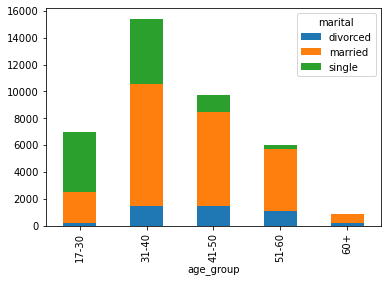

In [112]:
df15 = bank_add_full_imp.groupby(by=[ "age_group",'marital']).agg(no_customer=('campaign',
                                                             'count'))
df15['percent']= df15.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(df15)
df15.unstack()["no_customer"].plot.bar(stacked=True);

                     no_customer    percent
age_group contact                          
17-30     cellular          4632  66.580423
          telephone         2325  33.419577
31-40     cellular          9586  62.137810
          telephone         5841  37.862190
41-50     cellular          5740  58.883874
          telephone         4008  41.116126
51-60     cellular          3746  61.978822
          telephone         2298  38.021178
60+       cellular           786  88.116592
          telephone          106  11.883408


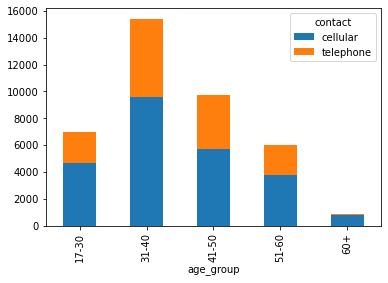

In [114]:
df16 = bank_add_full_imp.groupby(by=[ "age_group",'contact']).agg(no_customer=('campaign',
                                                             'count'))
df16['percent']= df16.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(df16)
df16.unstack()["no_customer"].plot.bar(stacked=True);

                       no_customer    percent
age_group poutcome                           
17-30     failure              819  11.772316
          nonexistent         5772  82.966796
          success              366   5.260888
31-40     failure             1713  11.103909
          nonexistent        13300  86.212485
          success              414   2.683607
41-50     failure              888   9.109561
          nonexistent         8648  88.715634
          success              212   2.174805
51-60     failure              531   8.785572
          nonexistent         5311  87.872270
          success              202   3.342158
60+       failure              211  23.654709
          nonexistent          504  56.502242
          success              177  19.843049


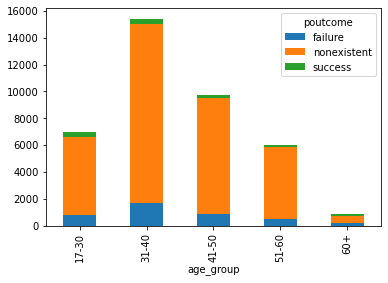

In [116]:
df17 = bank_add_full_imp.groupby(by=[ "age_group",'poutcome']).agg(no_customer=('campaign',
                                                             'count'))
df17['percent']= df17.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(df17)
df17.unstack()["no_customer"].plot.bar(stacked=True);

## conclusion

I.	Only 3 customers have experience default, so this feature has not predictive power and can be deleted. 

II.	The features that are 75% or more similar, that is – they do not vary much through the observation, can be deleted. Therefore, "previous" should be deleted.	

III.	People who are contacted with cellular answered ‘yes’ to the campaign, compared to ones with telephone.

IV.	December, March, October, and September are months on which individuals are most likely to accept the campaign. The day of week did not affect on the customers’ opinion about the campaign. 

V.	If individual has answered ‘yes’ to the previous campaign they will accept the current one with higher chance, compared to ones who have not experience before.

VI.	Retired, unemployed, and students responded to campaign better than other groups.

VII.	Although the number of 31-40 year old customers are higher than others, the 17-30 and over 60+ said ‘yes’ to the campaign more than others. And, 41-50 year old are the worse group.
